# Crecimiento celular

Gráficos y modelos de crecimiento celular. Algunos valores son inventados para realizar las visualizaciones de forma ilustrativa

## Cultivo por lote

Cultivo por lote o _batch_

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FIGURES = "crecimiento_celular"

os.makedirs(FIGURES, exist_ok=True)

### Etapas del crecimiento celular

Visualizaremos las 5 etapas. En general, la ecuación que modela este fenómeno es:

$$
X = X_{0} e^{\mu t}
$$

Para lograr la forma usaremos el modelo de Monod (más adelante):

$$
\mu = \mu_{max} \frac{S}{K_{S} + S}
$$

Cambiando la concentración de sustrato simularemos las étapas:

**I**: $S = 0$ existe sustrato, pero asumimos que no lo usa para replicarse

**II**: $S \in [100, 17] \left [ \frac{mg}{L} \right ]$ para simular velocidad máxima

**III**: $S = 0 \left [ \frac{mg}{L} \right ]$ para simular fase estacionaria. Reemplazando el $X_{0}$ por el $max(X_{II})$

**IV**: $S = \in [2.955, 2.4] \left [ \frac{mg}{L} \right ]$ para simular muerte

**V**: $S = \in [2.4, 2.3] \left [ \frac{mg}{L} \right ]$ para simular crecimiento críptico

Para _E. coli_:
$$
K_{S} = 2.0 \left [ \frac{mg}{L} \right ]
$$
$$
\mu_{max} = 2.3 \left [ h^{-1} \right ]
$$

Y condición incial:
$$
X_{0} = 0.1 \left [ \frac{mg}{L} \right ]
$$

In [3]:
x0 = 0.1
Ks = 2.0
mu_max = 2.3

def crecimiento(tiempo, S, x0 = x0):
    mu = mu_max * (S / (Ks + S))
    return x0 * np.exp(mu * tiempo)

In [4]:
t_i = np.linspace(0, 3)
S_i = np.linspace(0, 0)
X_i = crecimiento(t_i, S_i)

t_ii = np.linspace(3, 6)
S_ii = np.linspace(100, 17)
X_ii = crecimiento(t_ii, S_ii)

t_iii = np.linspace(6, 9)
S_iii = np.linspace(0, 0)
X_iii = crecimiento(t_iii, S_iii, x0 = X_ii[-1])

S_inflexión = 2.4

t_iv = np.linspace(9, 9.5)
S_iv = np.linspace(2.955, S_inflexión)
X_iv = crecimiento(t_iv, S_iv)

t_v = np.linspace(9.5, 10)
S_v = np.linspace(S_inflexión, 2.3)
X_v = crecimiento(t_v, S_v)

X_max = max(X_ii)

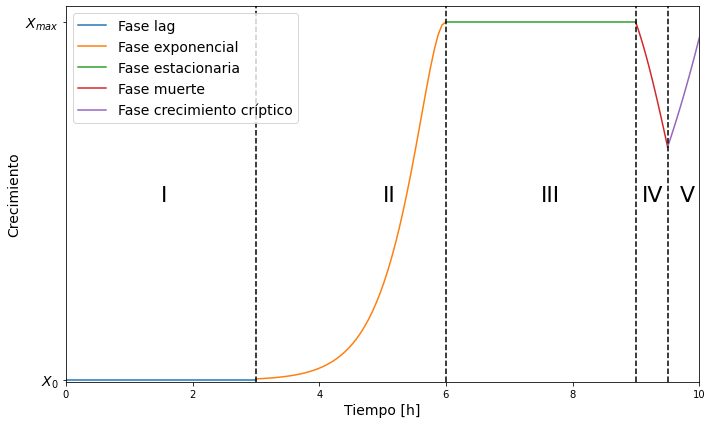

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(t_i, X_i, label="Fase lag")
ax.plot(t_ii, X_ii, label="Fase exponencial")
ax.plot(t_iii, X_iii, label="Fase estacionaria")
ax.plot(t_iv, X_iv, label="Fase muerte")
ax.plot(t_v, X_v, label="Fase crecimiento críptico")

ax.axvline(x = t_ii[0], color="k", linestyle="--")
ax.axvline(x = t_iii[0], color="k", linestyle="--")
ax.axvline(x = t_iv[0], color="k", linestyle="--")
ax.axvline(x = t_v[0], color="k", linestyle="--")

ax.legend(fontsize=14)

ax.set_xlim(0, 10)
ax.set_ylim(0 - 100, X_max + 1000)

ax.set_xlabel("Tiempo [h]", fontsize=14)
ax.set_ylabel("Crecimiento", fontsize=14)

ax.yaxis.set_ticks([x0, X_max])
ax.set_yticklabels(
    [r"$X_{0}$", r"$X_{max}$"], fontsize=14
)

ax.text(1.5, X_max / 2, "I", fontsize=22)
ax.text(5, X_max / 2, "II", fontsize=22)
ax.text(7.5, X_max / 2, "III", fontsize=22)
ax.text(9.1, X_max / 2, "IV", fontsize=22)
ax.text(9.7, X_max / 2, "V", fontsize=22)

fig.tight_layout()
fig.savefig(os.path.join(FIGURES, "crecimiento_celular_etapas.png"))

### Modelo de Monod

Velocidad de crecimiento en función del sustrato:

$$
\mu = \mu_{max} \cdot \frac{S}{S + K_{S}}
$$

Para el modelo usaremos $\mu_{max} = 1$ arbitrario y graficaremos en función de $\mu_{max}$

Usaremos $K_{S}$ para _Escherichia_ y **Glucosa**:

$$
K_{S} = 2.0 \left [ \frac{mg}{L} \right ]
$$

In [6]:
S = np.linspace(0, 100, 10000)  # mg / L

mu = mu_max * S / (S + Ks)

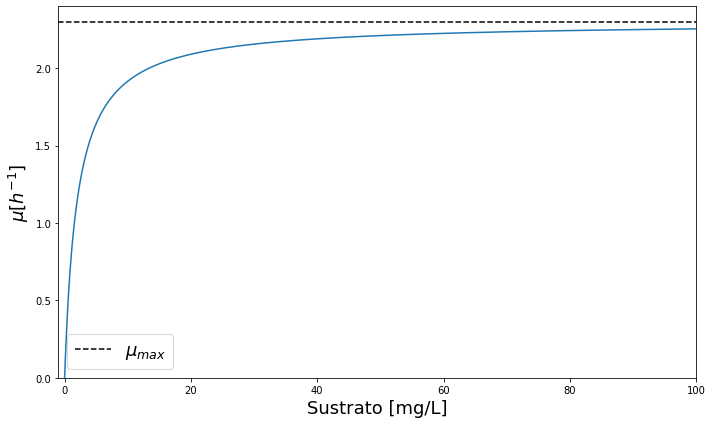

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(S, mu)

ax.axhline(y = mu_max, color="k", linestyle="--", label=r"$\mu_{max}$")

ax.legend(fontsize=18)

ax.set_xlim(- 1, 100)
ax.set_ylim(0, mu_max + 0.1)

ax.set_xlabel("Sustrato [mg/L]", fontsize=18)
ax.set_ylabel(r"$\mu [h^{-1}]$", fontsize=18)

#ax.yaxis.set_ticks([x0, X_max])
#ax.set_yticklabels(
#    [r"$X_{0}$", r"$X_{max}$"], fontsize=14
#)


fig.tight_layout()
fig.savefig(os.path.join(FIGURES, "monod.png"))

### Clasificación cinética de Gaden

Para la clasificación cinética repetiremos el gráfico de étapas, solo para **II** y **III**. Pero las curvas serán las mismas, pero variando $\mu$ usando los coeficientes $\alpha$ y $\beta$

Crecimiento: $X$

Asociada al crecimiento: $\alpha \cdot X$

No asociada al crecimiento: $0$ cuando estamos en exponencial y $\exp(\beta * t)$ cuando estamos en estacionaria.

Mixto:
$$
\frac{\alpha \cdot X + \text{No asociada}}{2}
$$

In [8]:
x0 = 0.1
Ks = 2.0
mu_max = 2.3

def curva(tiempo, S, x0 = x0, alpha = 0):
    mu = mu_max * (S / (Ks + S))
    return alpha * x0 * np.exp(mu * tiempo) 

In [9]:
t1 = np.array(
    list(np.linspace(0, 3)) + list(np.linspace(3, 6))
)
S1 = np.array(
    list(np.linspace(100, 20)) + list(np.linspace(20, 6.5))
)
X1 = crecimiento(t1, S1)

t2 = np.linspace(6, 9)
S2 = np.linspace(0, 0)
X2 = crecimiento(t2, S2, x0=X1[-1])

Sasc1 = curva(t1, S1, alpha = 0.5)
Sasc2 = curva(t2, S2, x0=X1[-1], alpha = 0.5)

Sno_asc1 = np.zeros(len(t1))
Sno_asc2 = np.exp((t2 - 6) * 2.45)

Smixto1 = (Sasc1 + Sno_asc1) / 2
Smixto2 = (Sasc2 + Sno_asc2) / 2

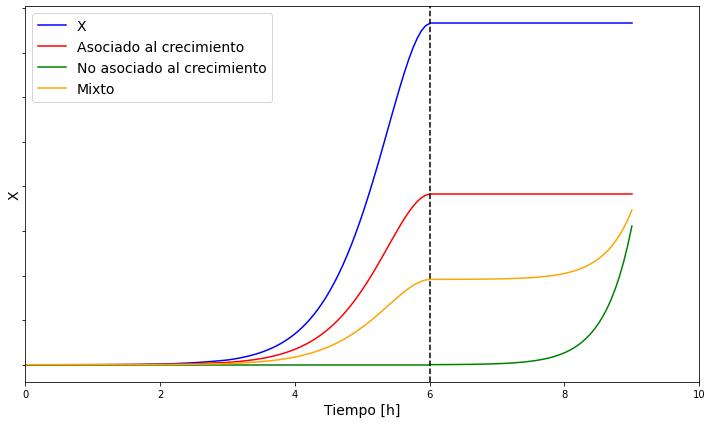

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(t1, X1, color = "b", label="X")
ax.plot(t2, X2, color = "b")

ax.plot(t1, Sasc1, color = "r", label="Asociado al crecimiento")
ax.plot(t2, Sasc2, color = "r")

ax.plot(t1, Sno_asc1, color = "green", label="No asociado al crecimiento")
ax.plot(t2, Sno_asc2, color = "green")

ax.plot(t1, Smixto1, color = "orange", label="Mixto")
ax.plot(t2, Smixto2, color = "orange")

ax.axvline(x = t2[0], color="k", linestyle="--")

ax.legend(fontsize=14)

ax.set_xlim(0, 10)

ax.set_xlabel("Tiempo [h]", fontsize=14)
ax.set_ylabel("X", fontsize=14)

ax.tick_params(labelleft=False)

fig.tight_layout()
fig.savefig(os.path.join(FIGURES, "cinetica_gaden.png"))